# W11 Lab Assignment

Dimension reduction with manifold learning; Basemap

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import manifold
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

## Visualizing the `Digits` dataset

Load the digits data. This is a classic dataset of images of handwritten digits. It contains 1797 images with \(8*8=64\) pixels each.



In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

digits.data stores the images:

In [3]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

and digits.target is the classes (or labels) that the images belong to. There are 10 classes in total.

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

We can display the first image.

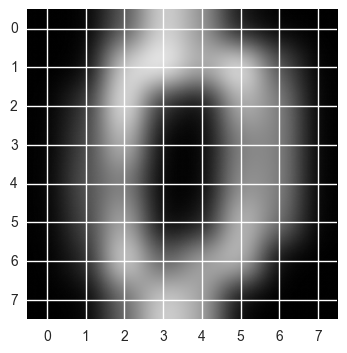

In [5]:
image_shape = (8,8)
plt.imshow( digits.data[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian' )

To run t-SNE, we want to first reorder the data points according to the handwritten numbers. We can use [np.vstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) and [np.hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html).

In [6]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

Then initialize a tsne model. For the meaning of the parameters see [here](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [7]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

Fit the model on the data.

In [8]:
digits_proj = tsne.fit_transform(X)

Plot the results. Seaborn's [hls](http://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette) palatte provides evenly spaced colors in HLS hue space, we can divide it into 10 colors.

In [9]:
palette = np.array(sns.color_palette("hls", 10))

Make a scatter plot of the first component against the second component, with color based on the numbers.

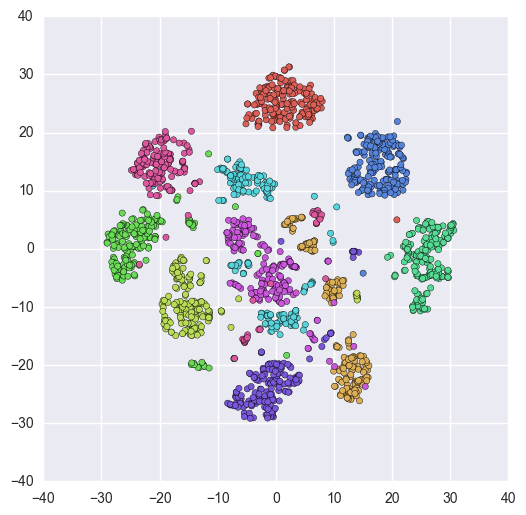

In [10]:
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[y])

t-SNE clearly seperates the digits into clusters. We can add some text for each cluster, with the place of the text being the center of the cluster. We can use `np.median` to find the centers. To make it more convenient, we can make the code into a function.

In [11]:
def plot_scatter(projection):
    plt.figure(figsize = (6,6))
    plt.scatter(projection[:,0], projection[:,1],c=palette[y])
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(projection[y == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=24)

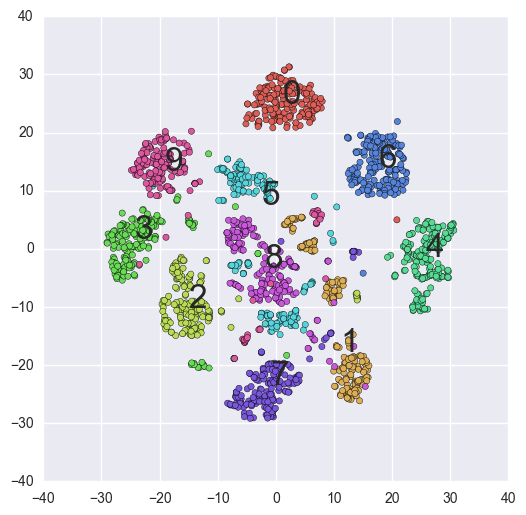

In [12]:
plot_scatter(digits_proj)

We talked about MDS and Isomap in class as two other manifold learning methods. Sklearn also has implementations for this two algorithms: [MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) and [Isomap](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html), so the usage is very similar. Examples for using this methods can be found [here](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html).

Can you make another two plots with these two methods? You only need to change the models and call the `plot_scatter` function.

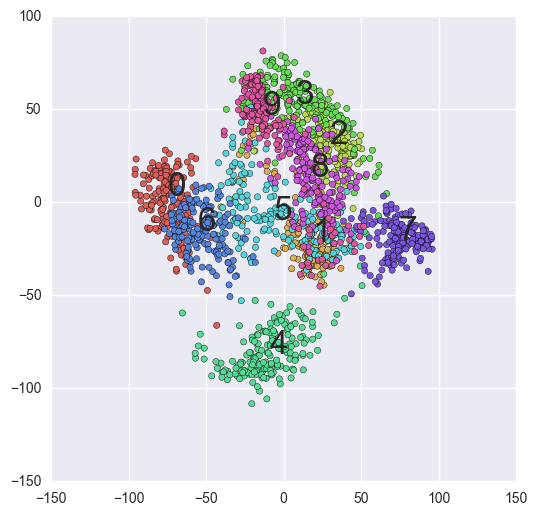

In [13]:
#TODO: plot results from MDS and Isomap
isomap = manifold.Isomap(n_components=2, n_neighbors=20)
X_isomap = isomap.fit_transform(X)
plot_scatter(X_isomap)

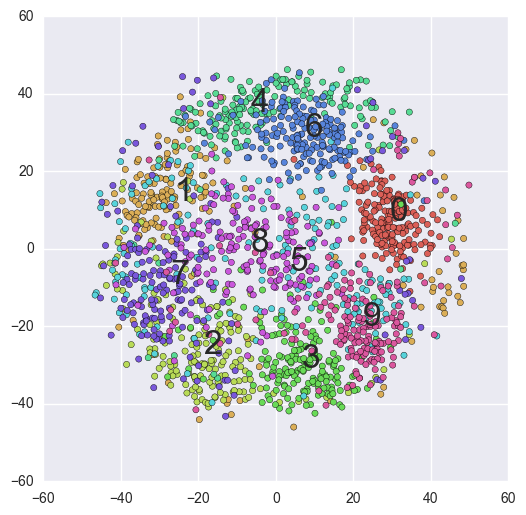

In [14]:
MDS = manifold.MDS(n_components=2,max_iter=100, n_init=1)
X_MDS = MDS.fit_transform(X)
plot_scatter(X_MDS)

## Basemap

`Basemap` (official documention [here](http://matplotlib.org/basemap/index.html), unofficial documentation [here](http://basemaptutorial.readthedocs.io/en/latest/index.html) ) is a Python package for visualization with maps. To install it, open your terminal and run:

`conda install basemap`

In [15]:
from mpl_toolkits.basemap import Basemap

Now we can draw our first map:

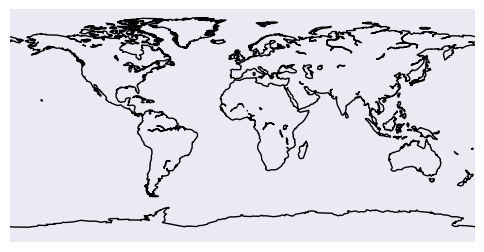

In [16]:
map = Basemap()
map.drawcoastlines()

The default projection is the [Equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection). We can change to another projection:

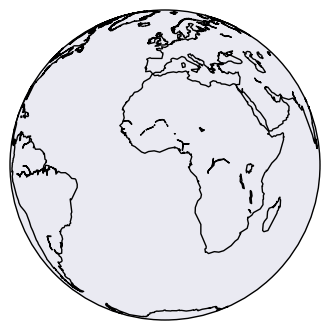

In [17]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)
map.drawcoastlines()

`lat_0` and `lon_0` sets the center of the map. Changing it allows us to see the other parts of the earth.

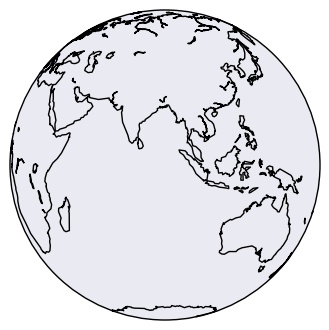

In [18]:
map = Basemap(projection='ortho', lat_0=0, lon_0=90)
map.drawcoastlines()

Fill the continents and oceans with some colors:

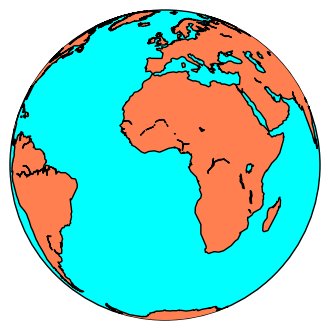

In [19]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

Add country lines:

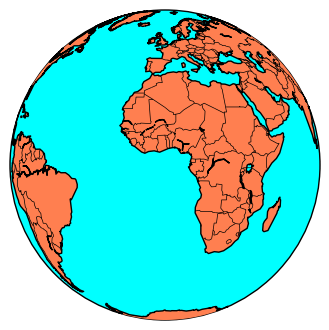

In [20]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
map.drawcountries()

The map is essentially a matplotlib object, so we can use matplotlib's methods to access it, for example, draw some points on the map.

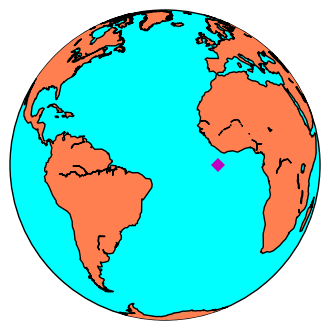

In [21]:
map = Basemap(projection='ortho', lat_0=0, lon_0=-30)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
x, y = map(-10, 0) #x=longitude, y=latitude
map.plot(x, y, marker='D',color='m')

Try with this: put a dot on your favourite city and put its name next to it. You can use the [text](http://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#text) function. (It may be necessary to rotate your map).

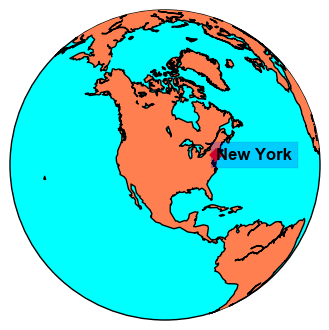

In [22]:
#TODO: draw a point for a city on the map.
map = Basemap(projection='ortho', lat_0=40, lon_0=-100)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
nylat = 40.78; nylon = -73.98
x, y = map(nylon, nylat)
map.plot(x, y, marker='D',color='r')
plt.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='center',color='k',
                    bbox=dict(facecolor='b', alpha=0.2))

It is also possible to only draw a region within a given "box" by passing the coordinates of the lower-left corner and upper-right corner.

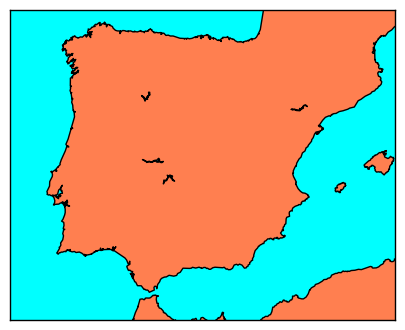

In [23]:
map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

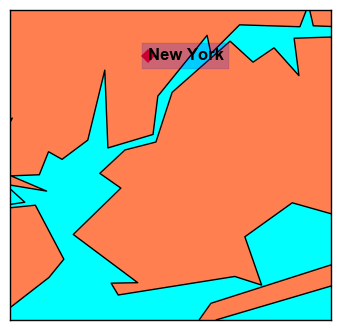

In [24]:
#TODO: plot the region with the city that you just plotted at the center.
map = Basemap(llcrnrlat=40.55,urcrnrlat=40.82,\
            llcrnrlon=-74.1, urcrnrlon=-73.82, lat_ts=40.5,resolution='i')

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
nylat = 40.78; nylon = -73.98
x, y = map(nylon, nylat)
map.plot(x, y, marker='D',color='r')
plt.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='center',color='k',
                    bbox=dict(facecolor='b', alpha=0.2))